# Final Project: Credit Card Customer Segmentation Using PCA, K-Means Clustering, and DBSCAN
<strong>Author:</strong> Josiah Ball<br>
<strong>Submission Date:</strong> 3/3/2025<br>
<strong>Course:</strong> DTSA 5510 Unsupervised Algorithms in Machine Learning<br>
<strong>GitHub Repository:</strong> https://github.com/Josiah4Jesus/DTSA_5510_UnsupervisedLearning

# Overview
In this notebook, I will take a dataset of customer records from a credit card company from the "Credit Card Dataset for Clustering" Kaggle competition[1] and use Principal Component Analysis (PCA) for dimension reduction and then compare two unsupervised learning methods for clustering: K-Means Clustering and Hierarchical Clustering. Then, we will compare the performance of the two unsupervised learning methods, discuss how the two models clustered customers, and discuss what the results would mean for the credit card company.<br>
<br>
<strong>PROJECT OVERVIEW:</strong>
<ul>
    <li><strong>Business Problem:</strong> A theoretical credit card company wants to segment its customer base based on customer behavior. They request that we data scientists identify natural segments within the data to enable more data-driven engagement (rather than coming up with their own artificial segments).</li>
    <li><strong>Unsupervised Model Solution:</strong> Use Principal Component Analysis (PCA) for dimension reduction and then compare K-Means Clustering and Hierarchical Clustering models.</li>
    <li><strong>Evaluation Technique:</strong> Use the Silhouette Score, Within-Cluster Sum of Squares (WCSS), and Davies-Bouldin Index (DBI) to compare the performance of the two models.</li>
</ul>
<strong>PROJECT STEPS:</strong>
<ol>
    <li>Perform EDA on the Dataset</li>
    <li>Perform PCA to Reduce Dimensionality</li>
    <li>Build and Train K-Means Clustering Model</li>
    <li>Build and Train Hierarchical Clustering Model</li>
    <li>Compare Results of Both Models</li>
    <li>Discuss Application for Business Context</li>
</ol>

# Step 1: Perform EDA on the Dataset

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

In [2]:
# Upload Dataset
df = pd.read_csv("CC_GENERAL.csv")
print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<strong>DISCUSSION:</strong> Below are the Column Descriptions from Kaggle Source [2]
|Column Name | Description|
| -------- | ------- |
|CUST_ID | Identification of Credit Card holder (Categorical)|
|BALANCE | Balance amount left in their account to make purchases |
|BALANCE_FREQUENCY | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)|
|PURCHASES | Amount of purchases made from account|
|ONEOFF_PURCHASES | Maximum purchase amount done in one-go|
|INSTALLMENTS_PURCHASES | Amount of purchase done in installment|
|CASH_ADVANCE | Cash in advance given by the user|
|PURCHASES_FREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
|ONEOFFPURCHASESFREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)|
|PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)|
|CASHADVANCEFREQUENCY | How frequently the cash in advance being paid|
|CASHADVANCETRX | Number of Transactions made with "Cash in Advanced"|
|PURCHASES_TRX | Number of purchase transactions made|
|CREDIT_LIMIT | Limit of Credit Card for user|
|PAYMENTS | Amount of Payment done by user|
|MINIMUM_PAYMENTS | Minimum amount of payments made by user|
|PRCFULLPAYMENT | Percent of full payment paid by user|
|TENURE | Tenure of credit card service for user|

In [4]:
# Gather General Information about Table
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<strong>DISCUSSION:</strong> Note that there are two columns with NULL values which we must inspect: `CREDIT_LIMIT` and `MINIMUM_PAYMENTS`.

In [6]:
# Null-Handling: CREDIT_LIMIT
df[pd.isnull(df["CREDIT_LIMIT"])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


<strong>DISCUSSION:</strong> Note that there is not an intuitive replacement for the credit limit in this case, but since it is one record out of 8,950, we will choose to drop the record rather than impute the value with either the dataset mean or a similar record's value.

In [8]:
# Drop Record with Missing CREDIT_LIMIT
df.drop(df[df['CUST_ID'] == 'C15349'].index, axis=0, inplace=True)
df.reset_index(inplace = False)
print(df.shape)

(8949, 18)


In [9]:
# Null-Handling: MINIMUM_PAYMENTS
df[pd.isnull(df["MINIMUM_PAYMENTS"])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


<strong>DISCUSSION:</strong> Note that many of the records who have missing values for `MINIMUM_PAYMENTS` have 0.00 for payements, meaning that they have never made a payment and thus have never had a minimum payment. We weill impute the value "0.00" for records which have missing `MINIMUM_PAYMENT` and `PAYMENTS = 0.0` and revisit the null count.

In [11]:
df.loc[df['PAYMENTS'] == 0.0, 'MINIMUM_PAYMENTS'] = 0.0
df.reset_index(inplace = False)
df[pd.isnull(df["MINIMUM_PAYMENTS"])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
54,C10056,6.660517,0.636364,310.00,0.00,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
99,C10104,0.000000,0.000000,0.00,0.00,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
146,C10152,19.354559,0.909091,689.70,0.00,689.70,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,10000.0,746.691026,NaN,0.0,12
319,C10330,0.478714,0.090909,734.97,159.00,575.97,0.000000,0.833333,0.083333,0.750000,0.000000,0,16,6000.0,1159.135064,NaN,0.0,12
1155,C11198,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,29272.486070,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,C18794,3.229304,0.545455,190.20,0.00,190.20,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1500.0,295.937124,NaN,0.0,12
8593,C18827,16.887571,0.363636,1083.00,1083.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
8647,C18882,0.006651,0.142857,0.00,0.00,0.00,164.137866,0.000000,0.000000,0.000000,0.142857,1,0,1200.0,5.070726,NaN,0.0,7
8753,C18992,0.223351,0.090909,336.00,0.00,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.0,12


<strong>DISCUSSION:</strong> Note that the number of the records who have missing values for `MINIMUM_PAYMENTS` dropped from 331 to 73, meaning well below 1% of users remain with missing data, we will drop these records as well.

In [13]:
# Drop Remaining Missing Values
df.drop(df[pd.isnull(df["MINIMUM_PAYMENTS"])].index, axis=0, inplace=True)
df.reset_index(inplace = False)
print(df.shape)

(8876, 18)


In [16]:
# Validate No Missing Data
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [20]:
# Explore Further
print(df.nunique())

CUST_ID                             8876
BALANCE                             8836
BALANCE_FREQUENCY                     43
PURCHASES                           6159
ONEOFF_PURCHASES                    4003
INSTALLMENTS_PURCHASES              4421
CASH_ADVANCE                        4313
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8637
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [25]:
# Delete Customer ID column
df_clean = df.drop('CUST_ID', axis=1).copy()
print(df_clean.shape)
df_clean.head()

(8876, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


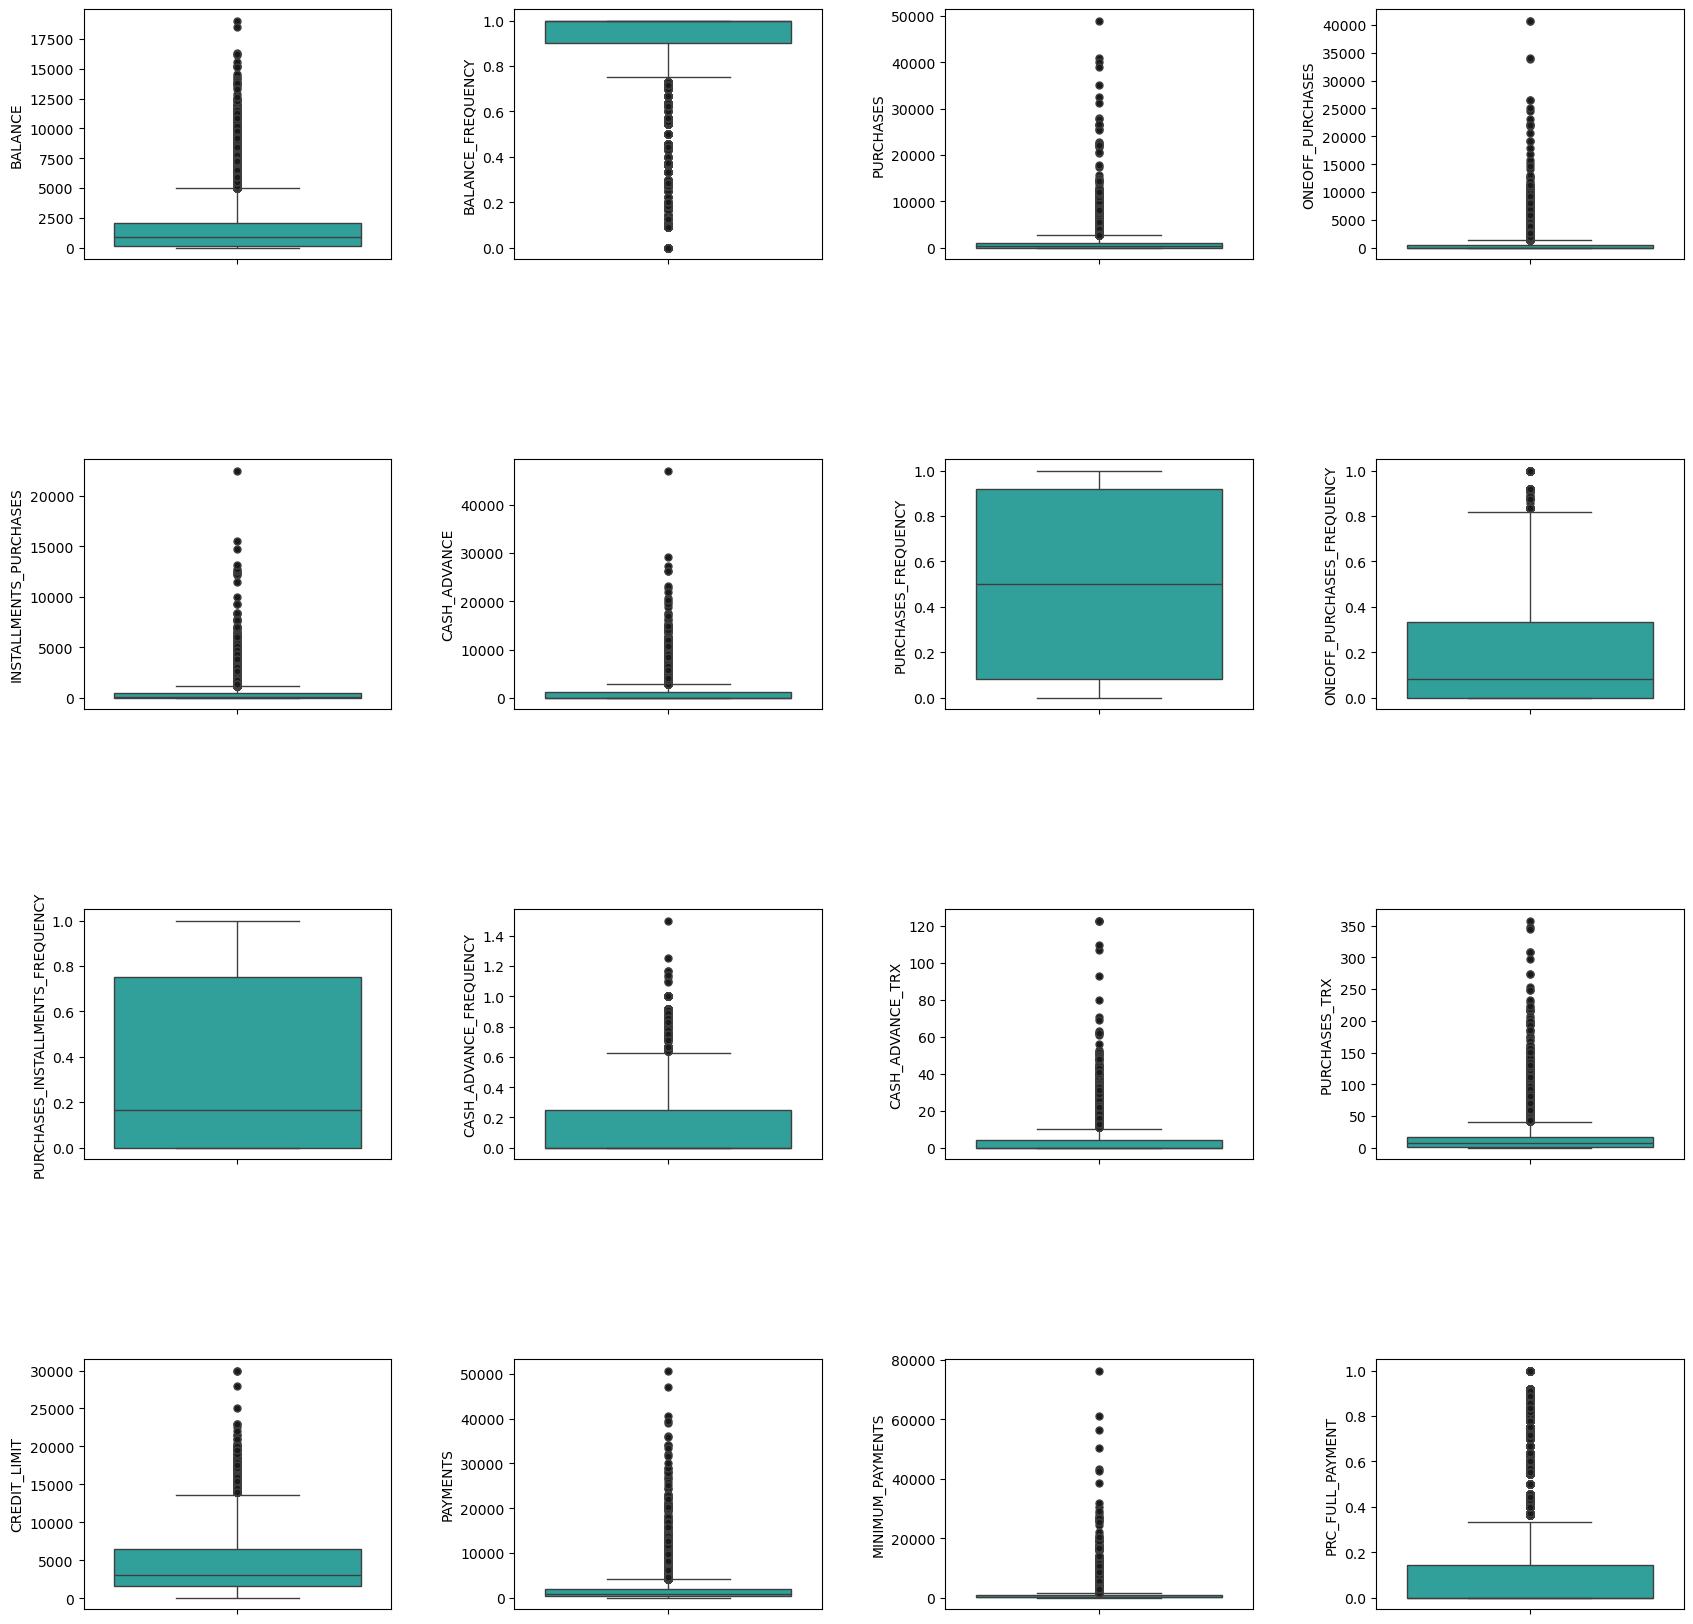

In [27]:
# Visualize Columns [3]
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df_clean.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(df_clean[df_clean.columns[i]], color='lightseagreen',flierprops = dict(markerfacecolor = '0.10', markersize = 5))

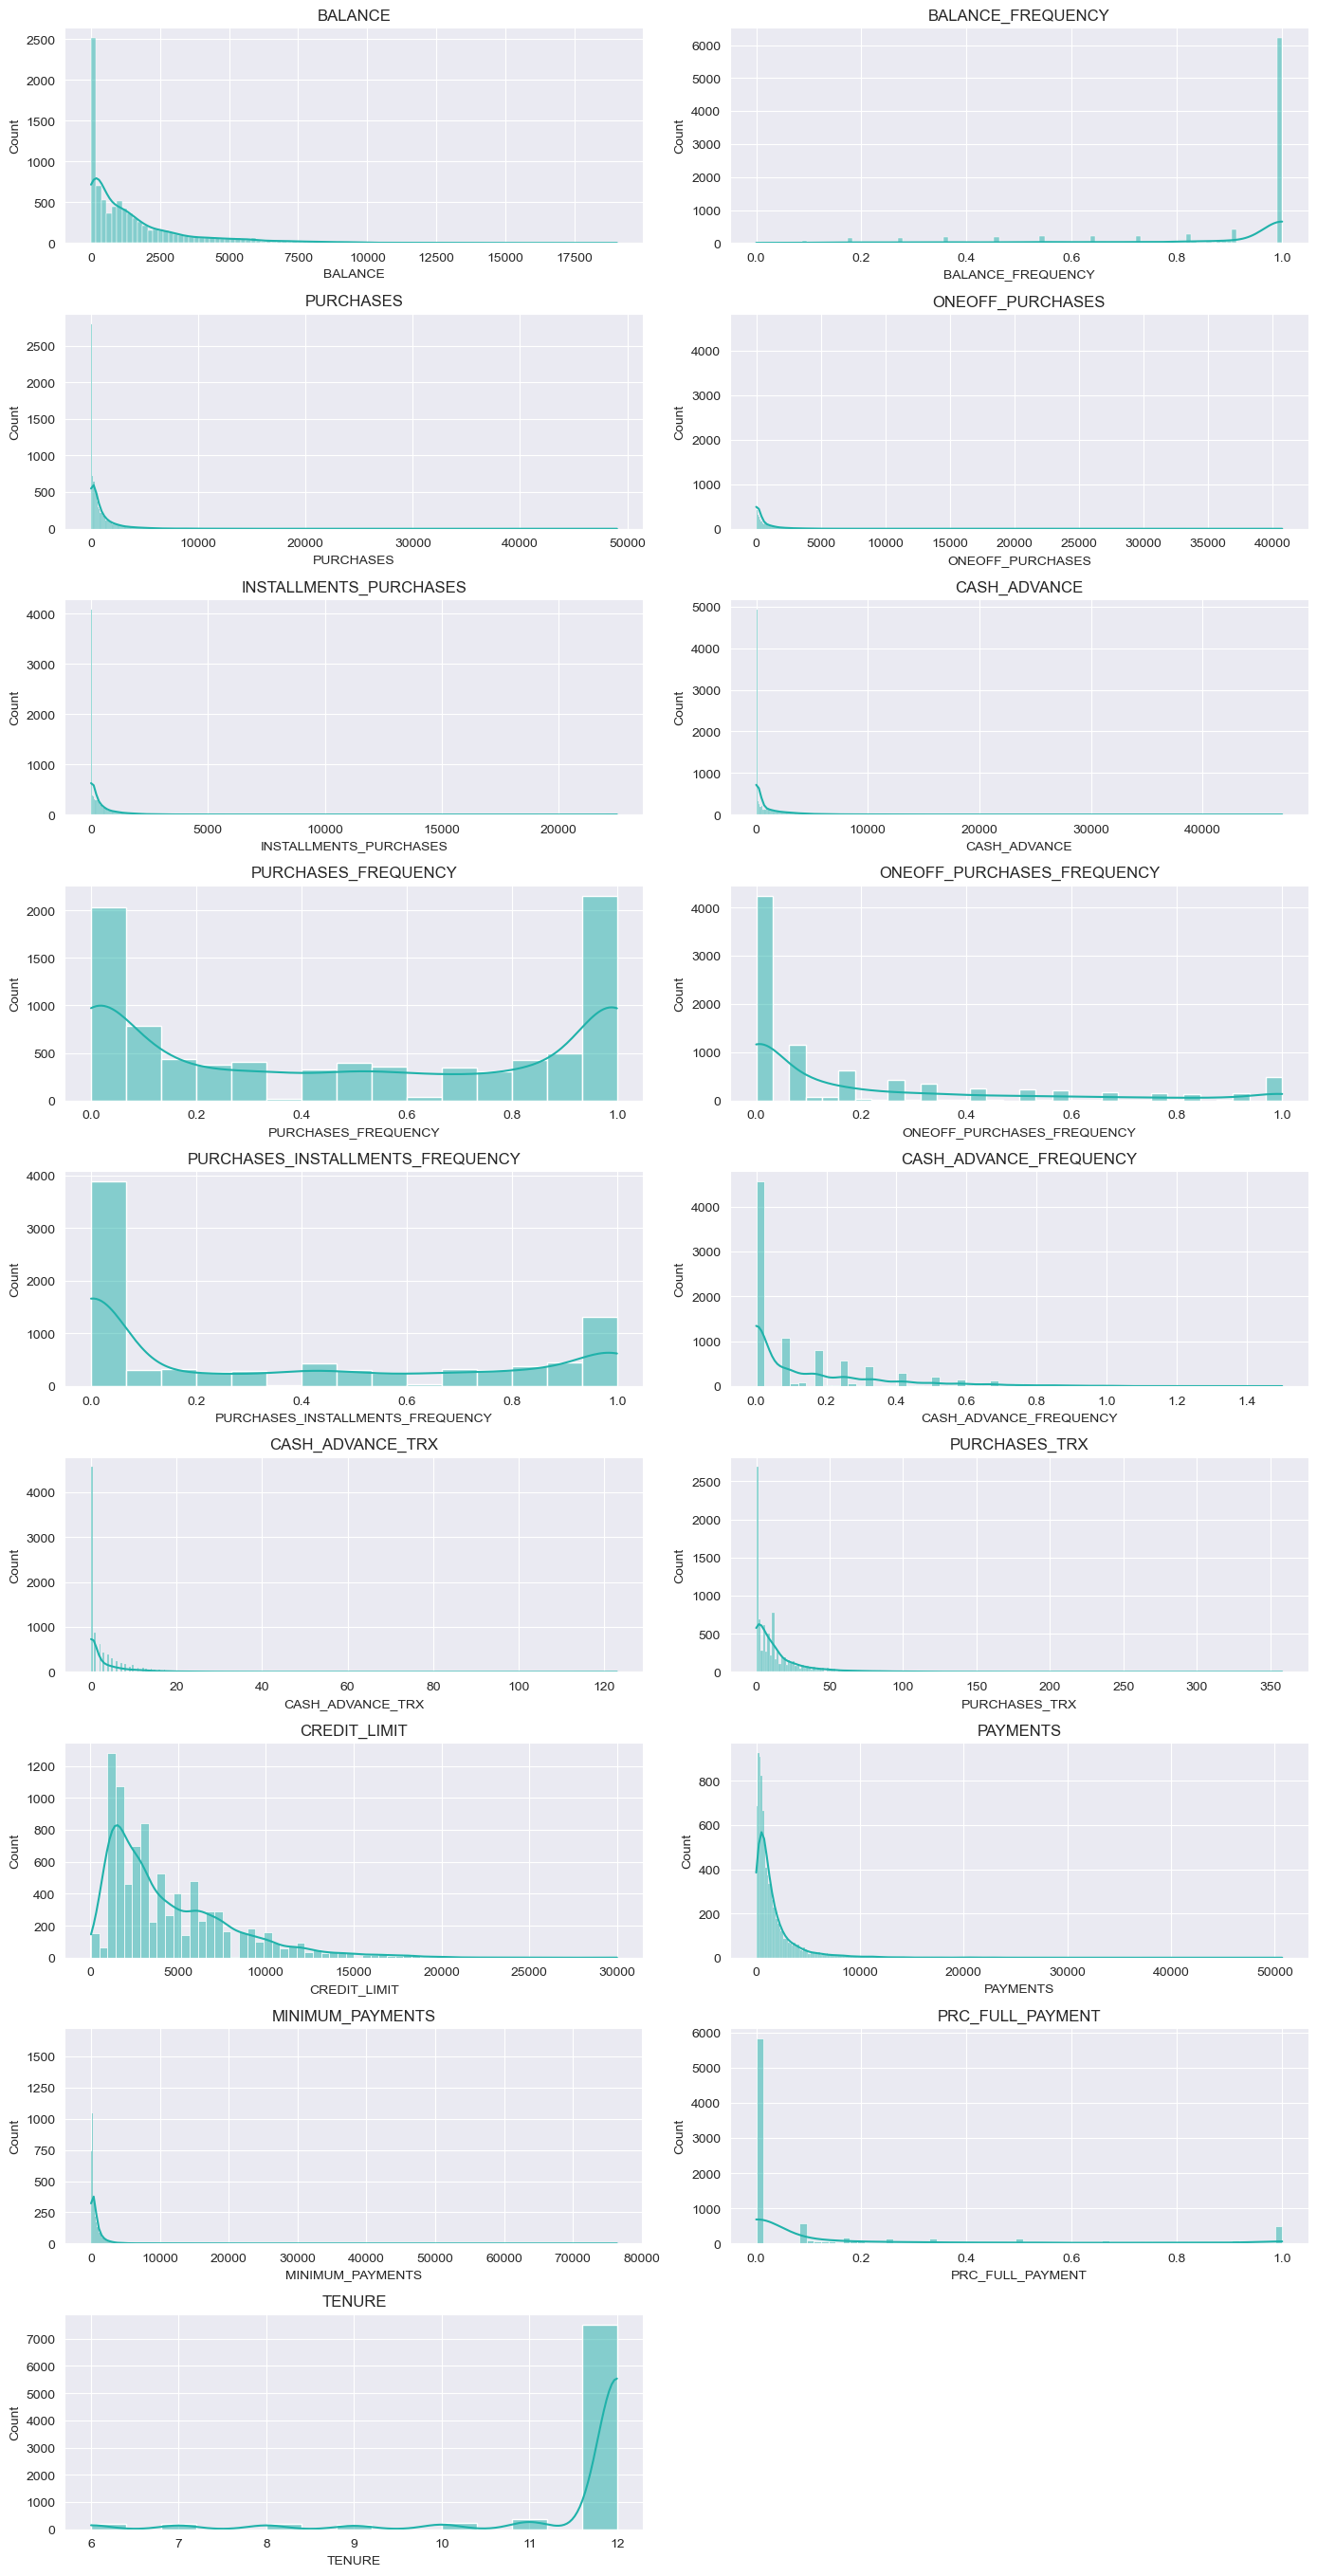

In [29]:
# Explore Further [4]
sns.set_style("darkgrid")

numerical_columns = df_clean.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_clean[feature], kde=True, color="lightseagreen")
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

# Step 2: Perform PCA to Reduce Dimensionality

In [31]:
# Fit PCA Model
pca = PCA()
Xt = pca.fit_transform(df_clean)

# Add First Two Principal Components to df_clean
df_clean['pca_1'] = Xt[:,0].tolist()
df_clean['pca_2'] = Xt[:,1].tolist()
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pca_1,pca_2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-4342.618461,910.828783
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4101.973627,-2475.340270
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1486.263643,-1969.880401
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1267.544331,-1284.683097
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-3759.872026,742.944267


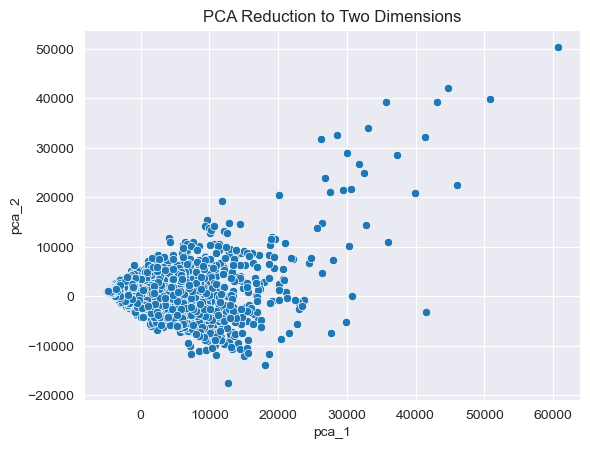

In [32]:
# Graphing in 2-D
ax = sns.scatterplot(data=df_clean, x="pca_1", y="pca_2")
plt.title("PCA Reduction to Two Dimensions")
plt.show()

# Step 3: Build and Train K-Means Clustering Model

<strong>DISCUSSION:</strong> The first step in training our K-Means Clustering model is to fix `k`, meaning to decide how many clusters we should define. In order to do this, we will use Within-Cluster Sum of Squares (WCSS). WCSS (also called "inertia") is a metric that measures the "tightness" of fit for each cluster, meaning something like the average distance between each point in each cluster with the centroid of the respective cluster.[5] We can use WCSS to find the optimal number of clusters by finding the "elbow point" on the graph of WCSS over number of clusters, which represents the point of inflection where we begin to gain less-and-less with each added k. [6] 

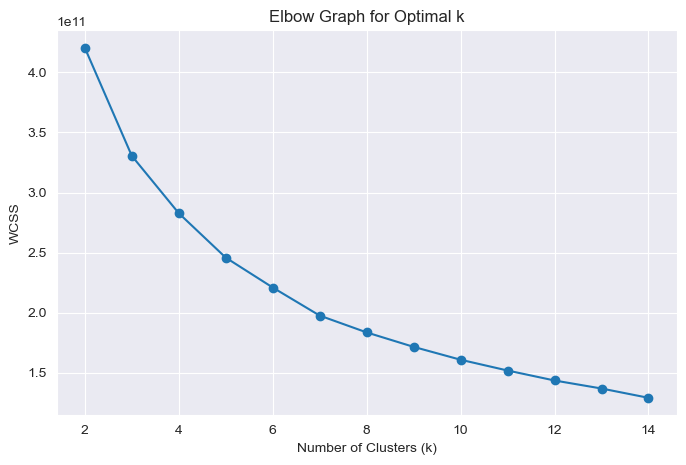

In [35]:
# Calculate WCSS for Differing values of k
wcss = []
K_range = range(2, 15) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(df_clean)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Graph for Optimal k')
plt.grid(True)
plt.show()

<strong>DISCUSSION:</strong> While it is a little hard to discern in this graph, I believe  the "elbow" of this graph is found at k=5, so we will train our k-means clustering model with k=5.

In [37]:
# Train k-means Clustering Method with k=5
X = df_clean[['pca_1','pca_2']]
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto").fit(X)
df_clean['K-Means Cluster'] = kmeans.labels_.tolist()
df['K-Means Cluster'] = kmeans.labels_.tolist()
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pca_1,pca_2,K-Means Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-4342.618461,910.828783,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4101.973627,-2475.340270,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1486.263643,-1969.880401,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1267.544331,-1284.683097,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-3759.872026,742.944267,2


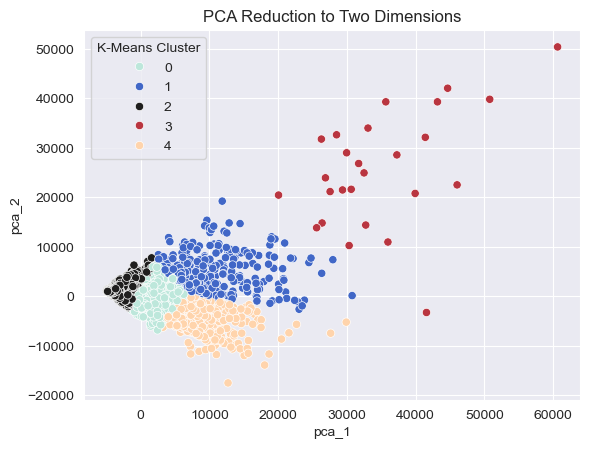

In [38]:
# Graph PCA with Clusters
palette = sns.color_palette("icefire", as_cmap=True)
ax = sns.scatterplot(data=df_clean, x="pca_1", y="pca_2", hue="K-Means Cluster", palette=palette)
plt.title("PCA Reduction to Two Dimensions")
plt.show()

<strong>DISCUSSION:</strong> Before we assess model performance and backtrack the results to find tangible groups (high spenders, low spendrs, etc.), we will build and train a Hierarchical Clustering Model to ensure we are getting the best results.

# Step 4: Build and Train Hierarchical Clustering Model

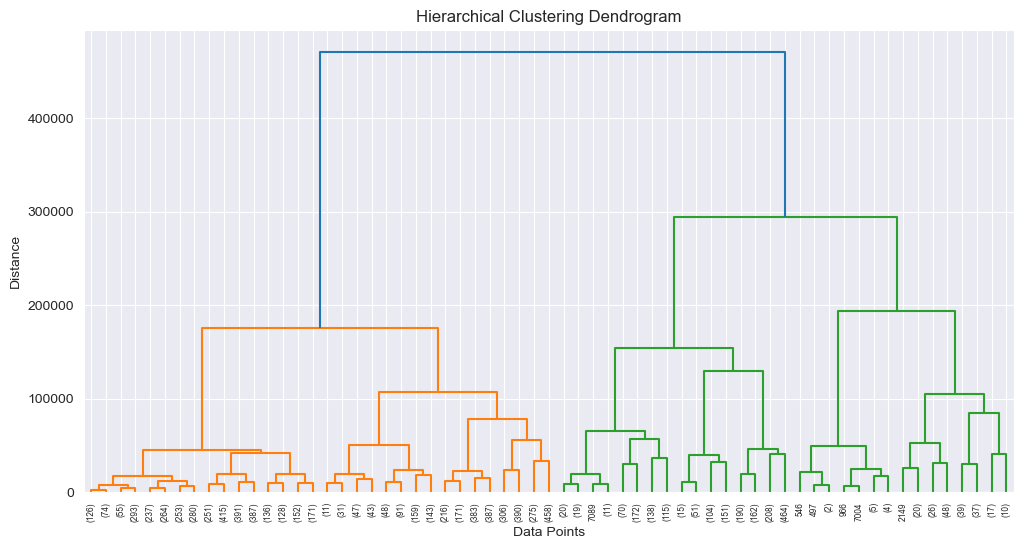

In [41]:
# Create Linkage Matrix
linkage_matrix = sch.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

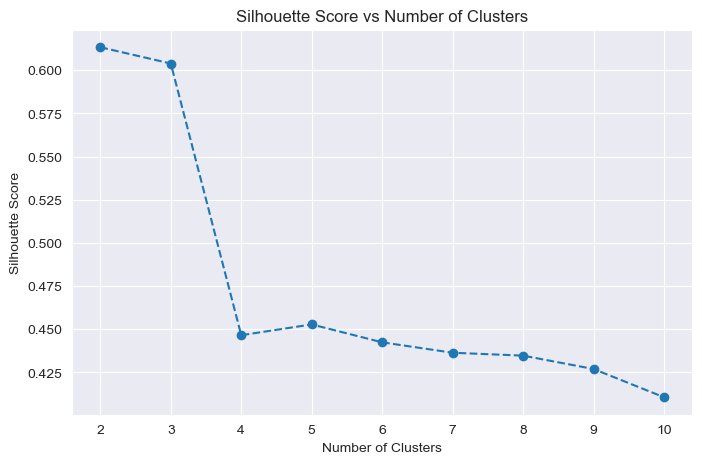

In [42]:
# Define range for number of clusters
cluster_range = range(2, 11)  # Testing from 2 to 10 clusters
silhouette_scores = []

for k in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = clustering.fit_predict(df_clean)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Score for Different Cluster Counts
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()


<strong>DISCUSSION:</strong> Both visually examining the dendrogram and computing the silhouette score for various number of clusters, we can see that the options of two or three clusters both are strong options. While picking two clusters would have slightly higher silhouette scoring, we will choose to use three clusters in order to give more segmentation in our business context.

In [44]:
# Define the number of clusters (choose based on dendrogram)
num_clusters = 3  # Example value; adjust based on the dendrogram

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
cluster_labels = agg_clustering.fit_predict(X)

# Add cluster labels to the original dataset
df_clean['Hierarchical Cluster'] = cluster_labels
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pca_1,pca_2,K-Means Cluster,Hierarchical Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,-4342.618461,910.828783,2,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,4101.973627,-2475.340270,0,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,1486.263643,-1969.880401,0,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,0.000000,0.000000,12,1267.544331,-1284.683097,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,-3759.872026,742.944267,2,1


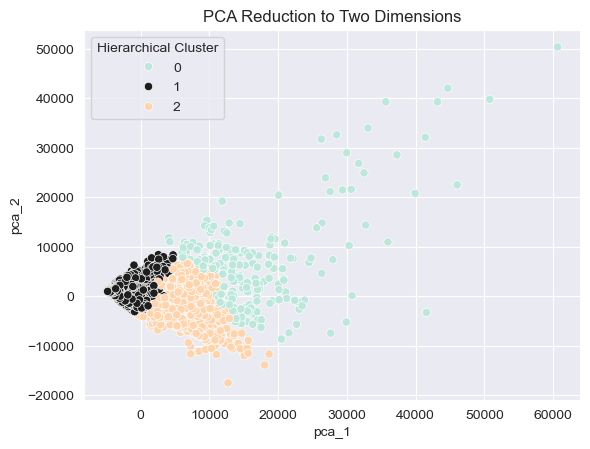

In [45]:
# Graph PCA with Clusters
palette = sns.color_palette("icefire", as_cmap=True)
ax = sns.scatterplot(data=df_clean, x="pca_1", y="pca_2", hue="Hierarchical Cluster", palette=palette)
plt.title("PCA Reduction to Two Dimensions")
plt.show()

# Step 5: Compare Results of Both Models

<strong>DISCUSSION:</strong> K-Means Clustering returned five clusters, while Heirarchical Clustering returned three. How do we know which model is better? We cannot use a metric such as the Adjusted Rand Index[7] because we do not have any ground truth to compare the results to (we could use this to compare how similar the two models are, but this would not tell us which is <em>better</em>. Because this is a true unsupervised problem, we will use Davies-Bouldin Index (DBI)[8] which is a metric created specifically to evaluate how compact and well-defined the clusters are. <strong>A <em>lower</em> DBI means better, more compact, and more well-defined clusters. Whichever model has a lower DBI will be considered the better model, and we will proceed with the model with whichever has a lower DBI.</strong>

In [49]:
dbi_kmc = davies_bouldin_score(X, df_clean['K-Means Cluster'])
dbi_hc = davies_bouldin_score(X, df_clean['Hierarchical Cluster'])

print(f"Davies-Bouldin Index - K-Means Clustering: {dbi_kmc:.4f}")
print(f"Davies-Bouldin Index - Hierarchical Clustering: {dbi_hc:.4f}")

Davies-Bouldin Index - K-Means Clustering: 0.7798
Davies-Bouldin Index - Hierarchical Clustering: 0.8489


<strong>DISCUSSION:</strong> Therefore, K-Means Clustering had better clusters, and we will proceed in our analysis using the K-Means Clustering model.

# Step 6: Discuss Application for Business Context

<strong>DISCUSSION:</strong> Out of this partition, I am particularly interested by the red dots of cluster 3. The model seems to have accurately identified cluster 3 as outliers. But what does this mean practically? How do we translate back from PCA to the columns of the dataframe to know what kind of outliers these represent? We can create some plots to help us see how the records in cluster 3 (and the others) are represented in our data.

In [53]:
# Calculate summary statistics per cluster
cluster_summary = df_clean.drop(columns=['pca_1', 'pca_2', 'Hierarchical Cluster'], inplace=False)
print(cluster_summary.groupby("K-Means Cluster").mean())

                     BALANCE  BALANCE_FREQUENCY     PURCHASES  \
K-Means Cluster                                                 
0                1994.337453           0.919466   1079.711458   
1                2957.787223           0.934406   6162.095653   
2                 721.264562           0.853422    513.797521   
3                5726.199010           0.961189  25263.596154   
4                5573.232413           0.947725   1126.901753   

                 ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
K-Means Cluster                                                           
0                      637.001485              442.853313   1246.951541   
1                     4143.874620             2020.111611   2380.880796   
2                      248.332301              265.776337    396.766175   
3                    20199.383462             5064.212692   3247.550934   
4                      651.868934              475.126718   3654.888590   

                 P

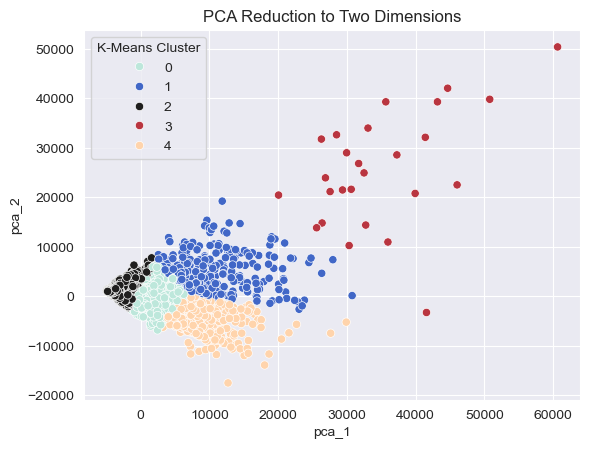

In [54]:
# Graph PCA with Clusters
palette = sns.color_palette("icefire", as_cmap=True)
ax = sns.scatterplot(data=df_clean, x="pca_1", y="pca_2", hue="K-Means Cluster", palette=palette)
plt.title("PCA Reduction to Two Dimensions")
plt.show()

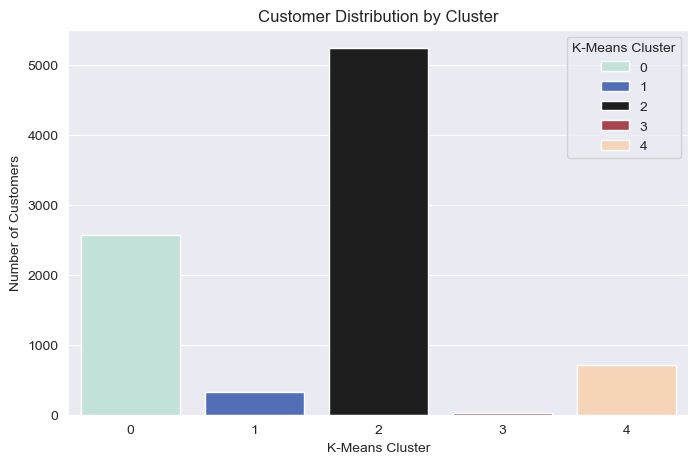

In [55]:
# Visualizing Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_clean["K-Means Cluster"], hue=df_clean["K-Means Cluster"], palette="icefire")
plt.xlabel("K-Means Cluster")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Cluster")
plt.show()

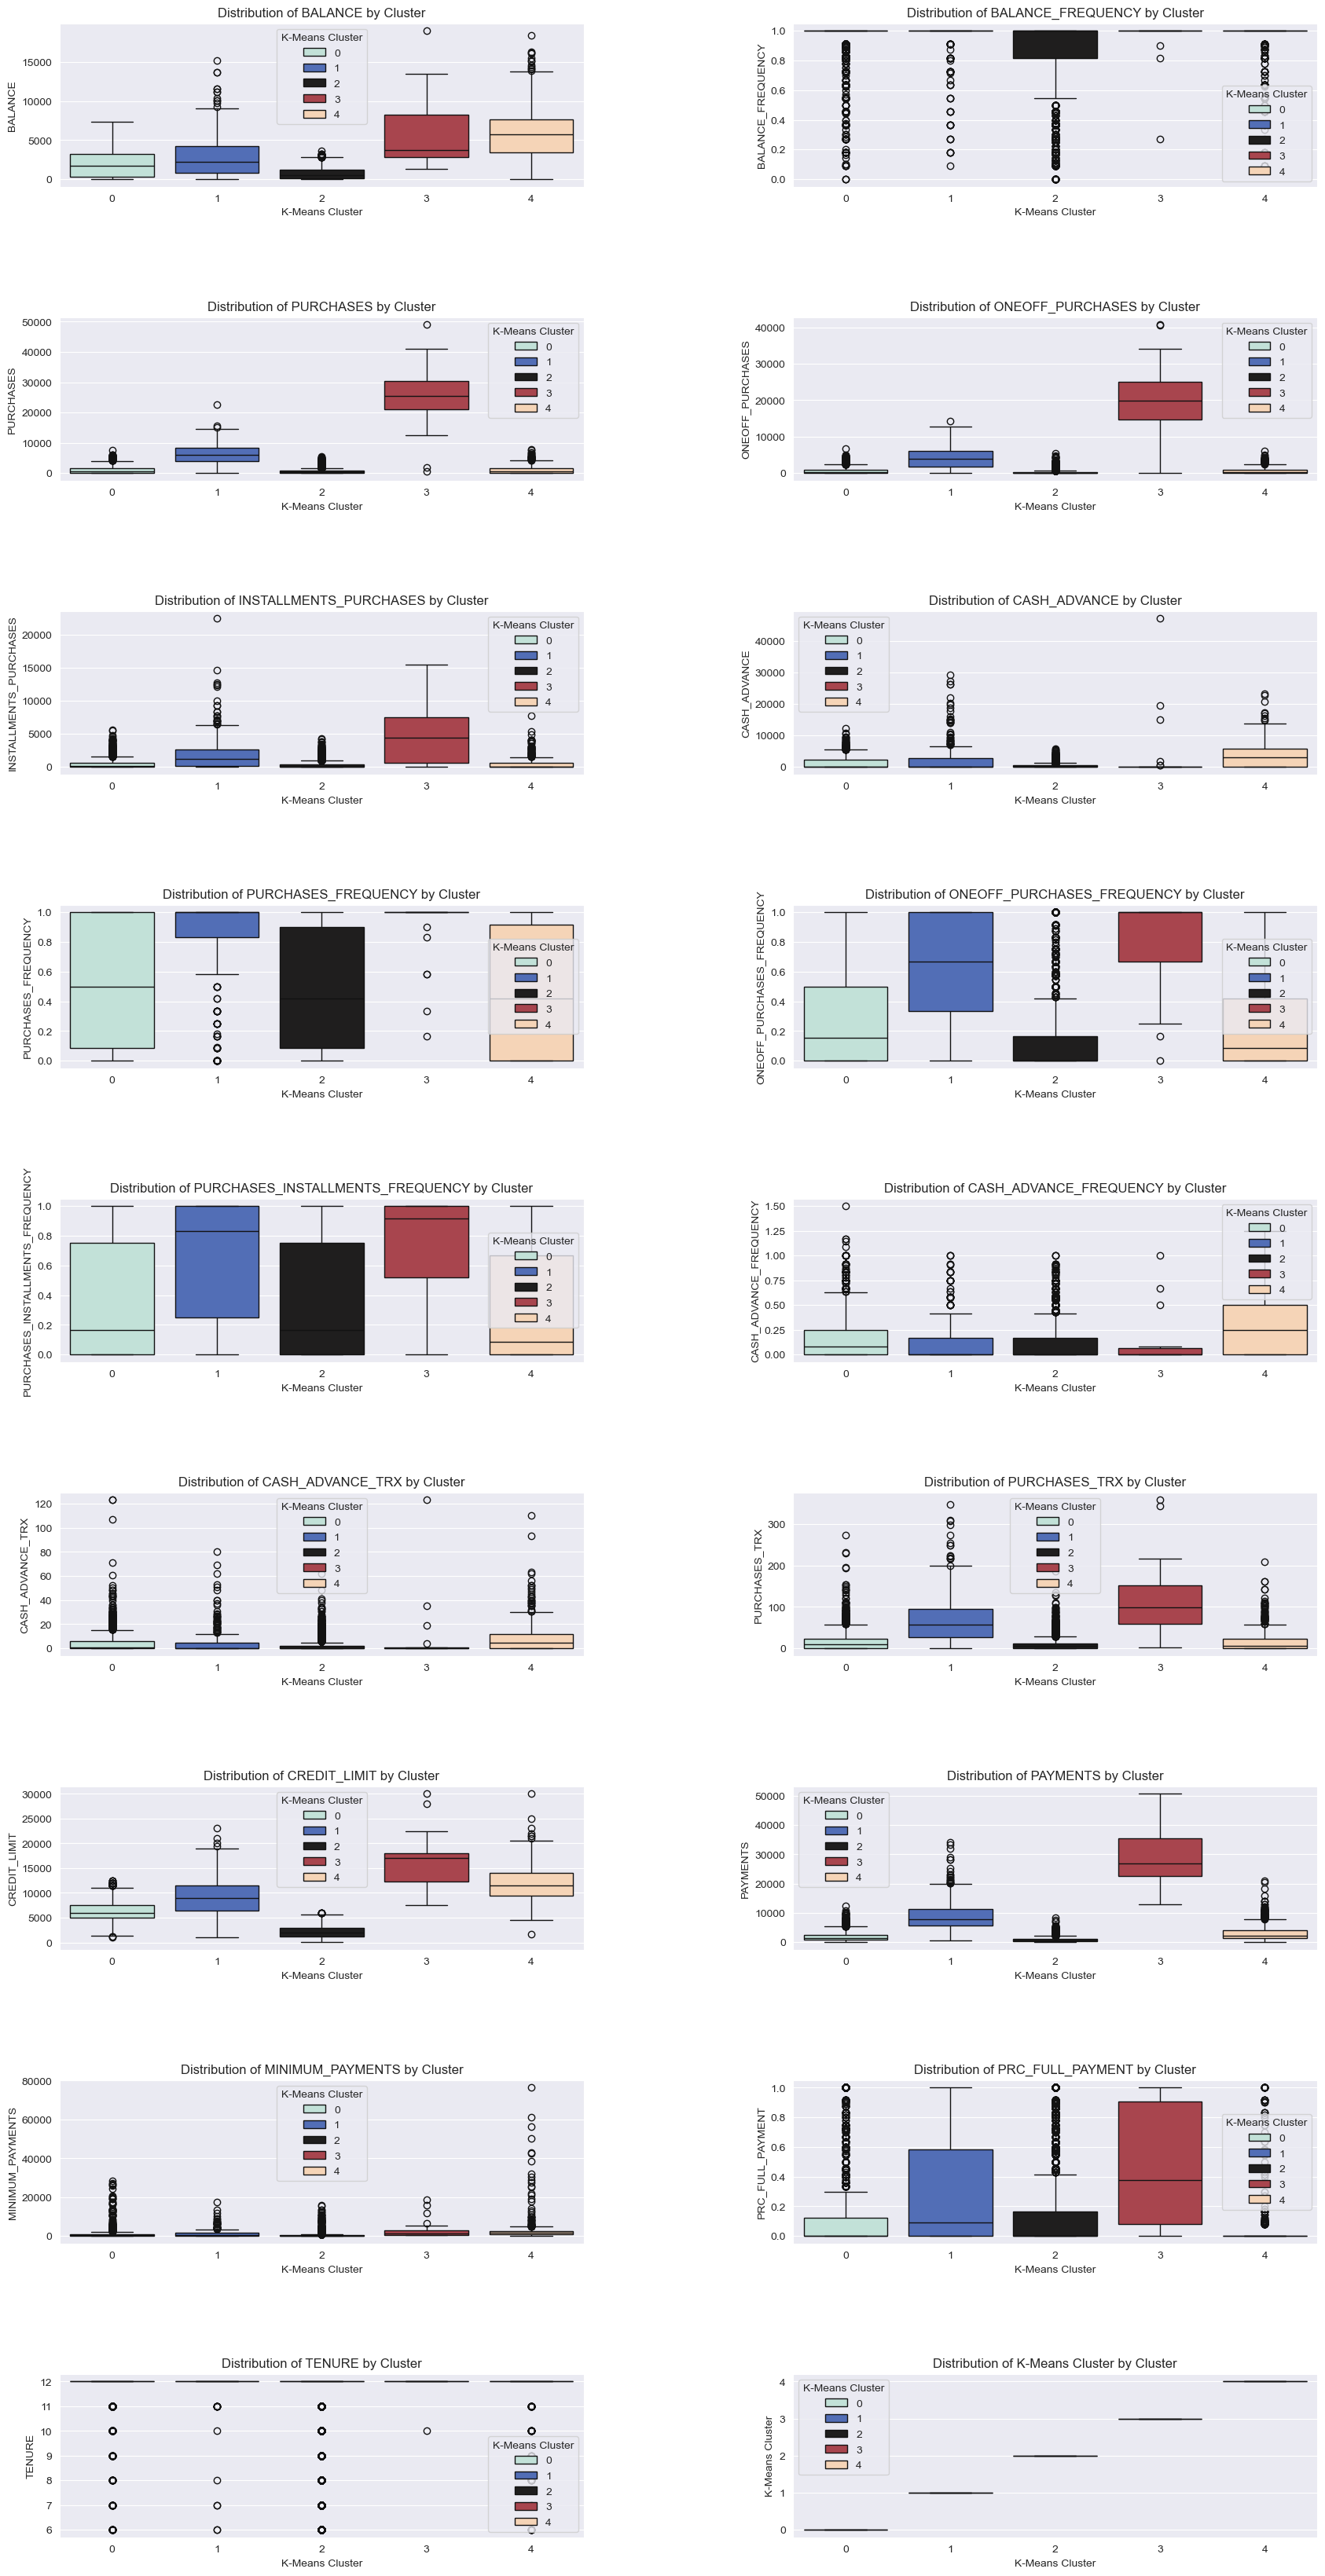

In [56]:
# Create figure and adjust layout
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20, 40))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
axes = axes.flatten()

features = cluster_summary.columns
for i, feature in enumerate(features):
    sns.boxplot(ax=axes[i], x="K-Means Cluster", y=feature, data=cluster_summary, hue="K-Means Cluster", palette="icefire")
    axes[i].set_title(f"Distribution of {feature} by Cluster")

plt.show()

<strong>DISCUSSION:</strong> Recall the Column Descriptions from Kaggle Source [9]
|Column Name | Description|
| -------- | ------- |
|CUST_ID | Identification of Credit Card holder (Categorical)|
|BALANCE | Balance amount left in their account to make purchases |
|BALANCE_FREQUENCY | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)|
|PURCHASES | Amount of purchases made from account|
|ONEOFF_PURCHASES | Maximum purchase amount done in one-go|
|INSTALLMENTS_PURCHASES | Amount of purchase done in installment|
|CASH_ADVANCE | Cash in advance given by the user|
|PURCHASES_FREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
|ONEOFFPURCHASESFREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)|
|PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)|
|CASHADVANCEFREQUENCY | How frequently the cash in advance being paid|
|CASHADVANCETRX | Number of Transactions made with "Cash in Advanced"|
|PURCHASES_TRX | Number of purchase transactions made|
|CREDIT_LIMIT | Limit of Credit Card for user|
|PAYMENTS | Amount of Payment done by user|
|MINIMUM_PAYMENTS | Minimum amount of payments made by user|
|PRCFULLPAYMENT | Percent of full payment paid by user|
|TENURE | Tenure of credit card service for user|

<strong>DISCUSSION:</strong> Putting these pieces of information together, we can conclude the following about the clusters:[10]
<ul>
    <li><strong>Cluster 0:</strong> Records in cluster 0 (which is the second most common cluster) <em><strong>represent middle-tier/average customers</strong></em>
        <ul>
            <li>Moderate balance (1,994) and spending (1,080).</li>
            <li>Moderate purchase frequency (0.52) and cash advance frequency (0.16).</li>
            <li>Moderate credit limit (6,448) and payments (1,915).</li>
        </ul>
    </li>
    <li><strong>Cluster 1:</strong> Records in cluster 1 <em><strong>represent high spending customers</strong></em>
        <ul>
            <li>Higher balance (2,958) and significant purchases (6,162).</li>
            <li>High purchase frequency (0.82) with a mix of one-off and installment purchases.</li>
            <li>Higher credit limit (9,216) and payments (9,251), with a reasonable full payment rate (30%).</li>
        </ul>
    </li>
    <li><strong>Cluster 2:</strong> Records in cluster 2 (which is the most common cluster) <em><strong>represent customers who are minimally engaged</strong></em>
        <ul>
            <li>Low balance (721) and very low spending (514).</li>
            <li>Lowest purchase frequency (0.46) and cash advance frequency (0.10).</li>
            <li>Smallest credit limit (2,189) and lowest payments (829).</li>
        </ul>
    </li>
    <li><strong>Cluster 3:</strong> Records in cluster 3 (which is the least common cluster) <em><strong>represent outlier customers who are extremely high spending and extremely engaged</strong></em>
        <ul>
            <li>Extremely high balance (5,726) and very high spending (25,264).</li>
            <li>Highest purchase frequency (0.90) and one-off purchases (20,199).</li>
            <li>Very high credit limit (16,292) and highest payments (28,842).</li>
        </ul>
    </li>
    <li><strong>Cluster 4:</strong> Records in cluster 4 <em><strong>represent high balance customers who spend moderately and rely on cash advances</strong></em>
        <ul>
            <li>High balance (5,573) but moderate spending (1,127).</li>
            <li>Higher cash advance frequency (0.30) and large cash advances (3,655).</li>
            <li>High credit limit (11,909) but relatively lower full payment rate (8.5%).</li>
        </ul>
    </li>
</ul>

# Works Cited
[1] Bhasin, Arjun. "Credit Card Dataset for Clustering". Kaggle. Accessed 03/02/2025. https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data.<br>
[2] Bhasin, Arjun. "Credit Card Dataset for Clustering". Kaggle. Accessed 03/02/2025. https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data.<br>
[3] Rafiee, Ahmad. "Customer Segmentation| EDA, Clustering and PCA". Kaggle. Accessed 03/02/2025. https://www.kaggle.com/code/ahmadrafiee/customer-segmentation-eda-clustering-and-pca.<br>
[4] "EDA | Exploratory Data Analysis in Python". GeeksforGeeks. Last updated 01/13/2025. https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/.<br>
[5] Rallabandi, Srikari. "WCSS: How many clusters are good enough?". Medium. Published 07/31/2024. https://medium.com/@sreeku.ralla/wcss-how-many-clusters-are-good-enough-74f91c06dc75. <br>
[6] Rallabandi, Srikari. "WCSS: How many clusters are good enough?". Medium. Published 07/31/2024. https://medium.com/@sreeku.ralla/wcss-how-many-clusters-are-good-enough-74f91c06dc75. <br>
[7] "Rand-Index in Machine Learning". GeeksforGeeks. Last updated 04/22/2024. https://www.geeksforgeeks.org/rand-index-in-machine-learning/.<br>
[8] "Davies-Bouldin Index". GeeksforGeeks. Last updated 11/05/2023, https://www.geeksforgeeks.org/davies-bouldin-index/.<br>
[9] Bhasin, Arjun. "Credit Card Dataset for Clustering". Kaggle. Accessed 03/02/2025. https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data.<br>
[10] Summary was compiled with the assistance of ChatGPT. 